https://leetcode.com/problems/sum-of-nodes-with-even-valued-grandparent/description/    
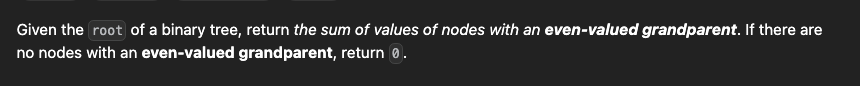

In [ ]:
#define Node TreeNode
class Solution {
private:
    void dfs(Node* node,Node* par,Node* grandPar,int &ansSum){
        if(!node) return;
        if(grandPar and (grandPar->val)%2==0){
            ansSum+=node->val;
        }
        dfs(node->left,node,par,ansSum);
        dfs(node->right,node,par,ansSum);
    }

public:
    int sumEvenGrandparent(TreeNode* root) {
        int ansSum=0;
        if(!root) return ansSum;
        Node *par=nullptr, *grandPar=nullptr;
        dfs(root,par,grandPar,ansSum);
        return ansSum;
    }
};

https://leetcode.com/problems/linked-list-in-binary-tree/description/   
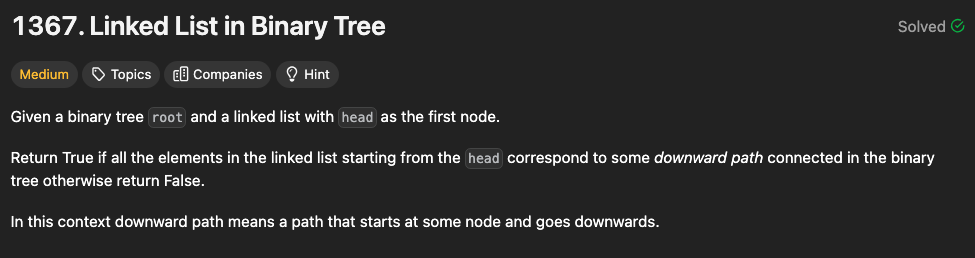

In [ ]:
class Solution {
    public:
        bool check(ListNode* listNode, TreeNode* treeNode ){
            if(!listNode) return 1;
            if(!treeNode) return 0;
            if(listNode->val!=treeNode->val){
                return 0;
            }
            return check(listNode->next,treeNode->left) or 
                   check(listNode->next,treeNode->right);
        }
    
    
        bool isSubPath(ListNode* listNode, TreeNode* treeNode) {
            if(!listNode) return 1;
            if(!treeNode) return 0;
            //recursion 1
            return check(listNode, treeNode) or
                   isSubPath(listNode, treeNode->left) or
                   isSubPath(listNode, treeNode->right);
        }
    };

All root to leaf path

https://www.geeksforgeeks.org/problems/root-to-leaf-paths/1

In [ ]:
void f(vector<vector<int>> &ans, vector<int> &tmp, Node* node){
    if(!node) return;
    tmp.push_back(node->data);
    if(!node->left and !node->right){
        ans.push_back(tmp);
        tmp.pop_back();
        return;
    }
    f(ans,tmp,node->left);
    f(ans,tmp,node->right);
    tmp.pop_back();
}
 
 
vector<vector<int>> Paths(Node* root){
    vector<vector<int>> ans;
    vector<int> tmp;
    f(ans,tmp,root);
    return ans;
}

Maximum root to leaf path sum

https://practice.geeksforgeeks.org/problems/maximum-sum-leaf-to-root-path/1

In [ ]:
int f(Node* root){
    if(!root) return INT_MIN;
    if(!root->left and !root->right) return root->data;
    return root->data+ max(f(root->left),f(root->right));
}


int maxPathSum(Node* root) { 
    if(!root) return 0; 
    return f(root);
} 

Count Good Nodes in Binary Tree

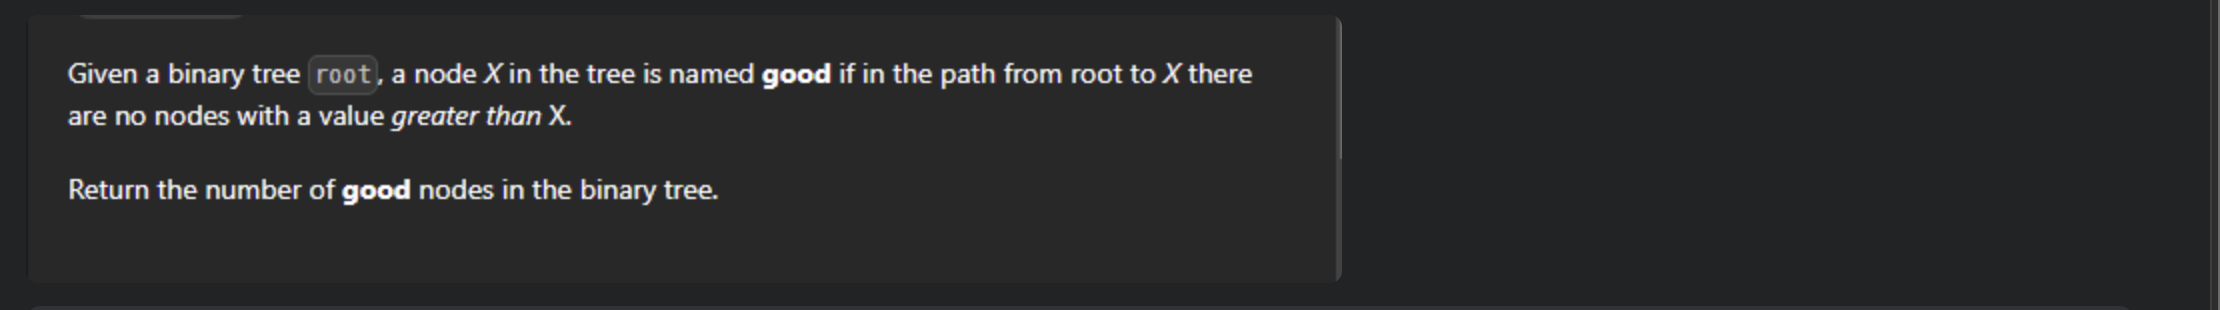

https://leetcode.com/problems/count-good-nodes-in-binary-tree/description/

In [ ]:
void t(TreeNode* node, int &ans, int maxx){
    if(!node) return;
    if(node->val>=maxx){
        ans+=1;
        maxx=node->val;
    }
    t(node->left,ans,maxx);
    t(node->right,ans,maxx);
}

int goodNodes(TreeNode* root) {
    if(!root) return 0;
    int ans=1;
    //root is always good
    int maxx=root->val;
    t(root->left,ans,maxx);
    t(root->right,ans,maxx);
    return ans;
}

https://leetcode.com/problems/maximum-difference-between-node-and-ancestor/description/

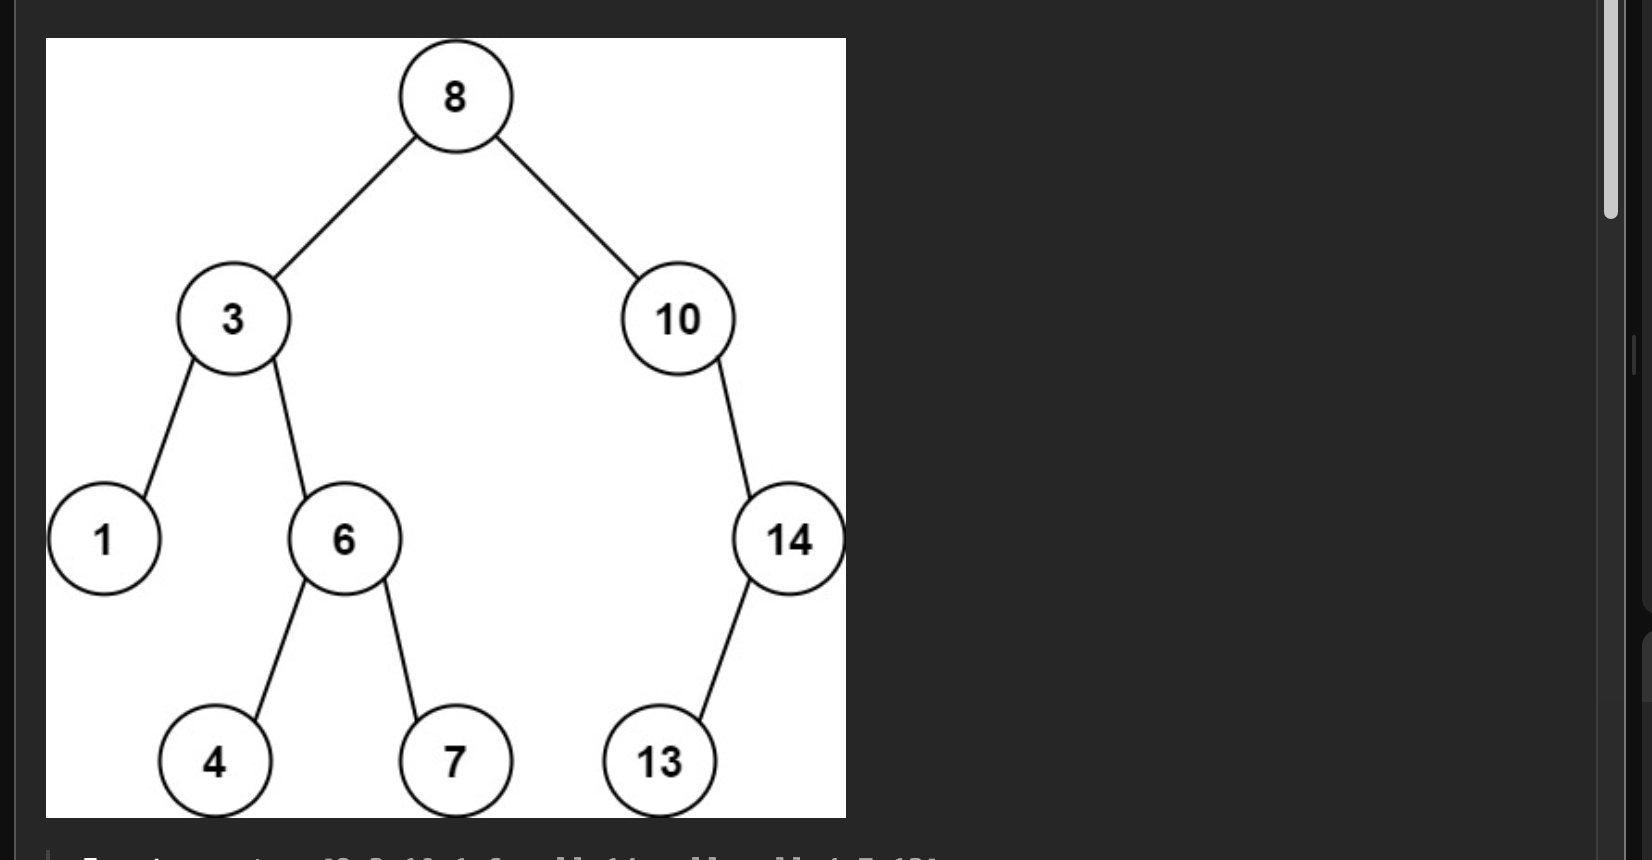

In [ ]:
class Solution {
public:

    void f(TreeNode* node, int maxx, int minn, int &ans){
        if(!node) return;
        maxx=max(maxx,node->val);
        minn=min(minn,node->val);
        if(!node->left and !node->right){
            ans=max(ans,maxx-minn);
            return;
        }
        f(node->left,maxx,minn,ans);
        f(node->right,maxx,minn,ans);
    }
    

    int maxAncestorDiff(TreeNode* root) {
        int ans=INT_MIN,maxx=INT_MIN, minn=INT_MAX;
        f(root, maxx, minn, ans);
        return ans;
    }

};

# how beautifully recursion works!!

https://leetcode.com/problems/pseudo-palindromic-paths-in-a-binary-tree/

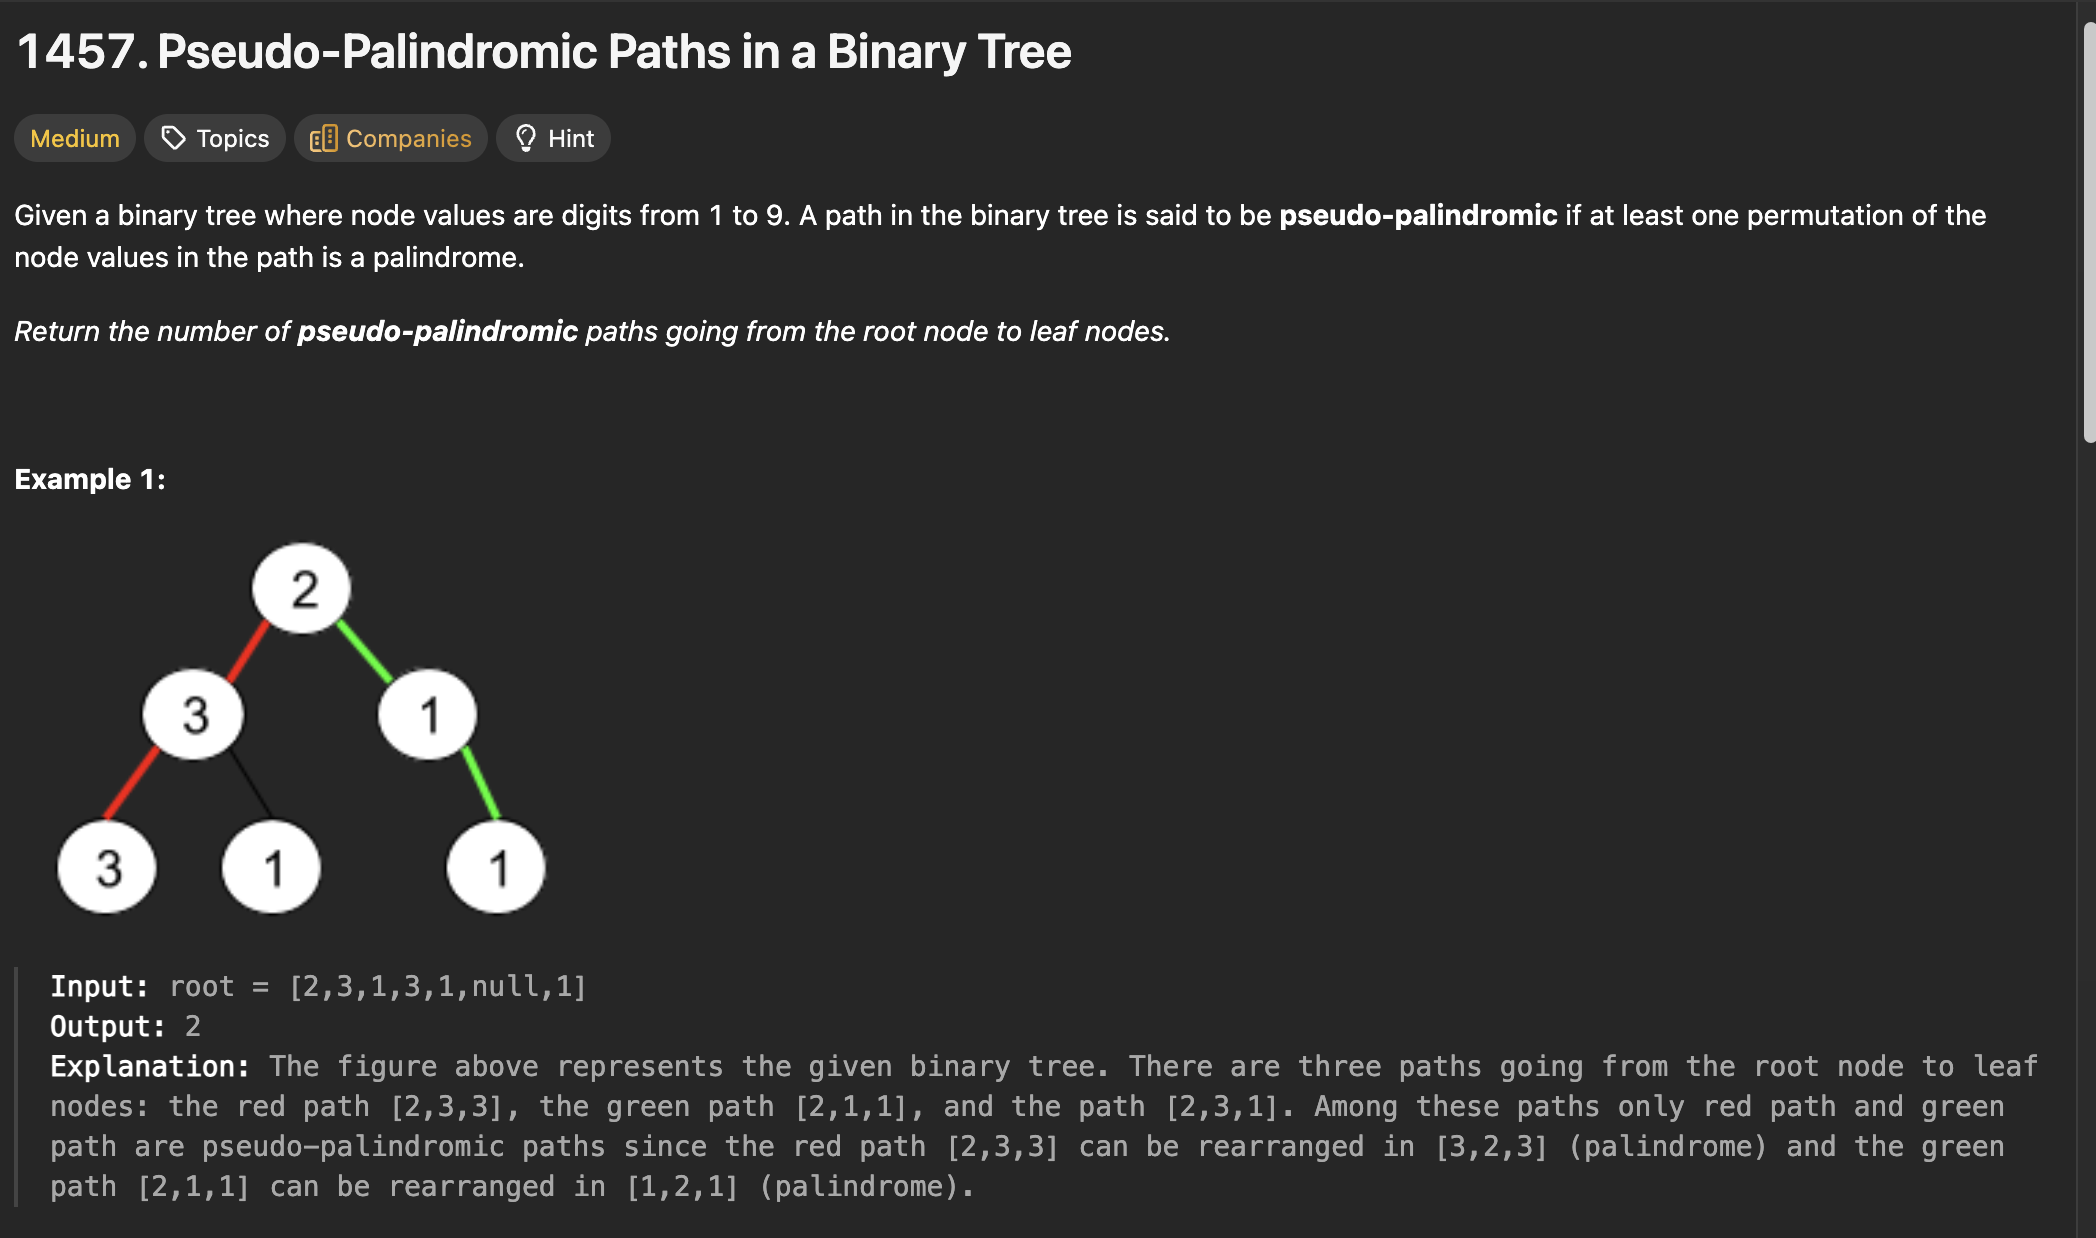

In [ ]:
class Solution {
    public:
        void dfs(TreeNode* node, unordered_map<int, int> &m, int &ans){
            if(!node) return;
            m[node->val]++;
            if(!node->left and !node->right){
                int cnt=0;
                for(auto p: m){
                    if(p.second%2){
                        cnt++;
                    }
                }
                if(cnt<=1){
                    ans++;
                }
            }
    
            dfs(node->left, m, ans);
            dfs(node->right, m, ans);        
            m[node->val]--;        
        }
    
    
        int pseudoPalindromicPaths (TreeNode* root) {
            unordered_map<int, int> m;
            int ans=0;
            dfs(root,m,ans);
            return ans;
        }
    };